In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_data_df = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='outer')

# Display the data table for preview
mouse_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice. Display the number of unique mice IDs.

unique_mice = mouse_data_df['Mouse ID'].nunique()
unique_mice

249

In [3]:
#check for any mouse ID with duplicate time points. 
#Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

mouse_data_df.sort_values('Mouse ID')

dup_mouse_time = mouse_data_df[mouse_data_df.duplicated(['Mouse ID', 'Timepoint'])]

dup_mouse_id = dup_mouse_time['Mouse ID']
dup_mouse_id

909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

dup_mouse = mouse_data_df.loc[mouse_data_df['Mouse ID'] == 'g989']

dup_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_mouse_data_df = pd.DataFrame()
clean_mouse_data_df = mouse_data_df[mouse_data_df['Mouse ID'] !='g989']
clean_mouse_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
unique_mice = clean_mouse_data_df['Mouse ID'].nunique()
unique_mice

248

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

tumor_drug_mean = clean_mouse_data_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
tumor_drug_median = clean_mouse_data_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
tumor_drug_var = clean_mouse_data_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
tumor_drug_std = clean_mouse_data_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
tumor_drug_sem = clean_mouse_data_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]

# Assemble the resulting series into a single summary DataFrame.

drug_tumor_df = pd.DataFrame({'Mean Tumor Volume': tumor_drug_mean, 
                              'Median Tumor Volume': tumor_drug_median,
                              'Tumor Volume Variance': tumor_drug_var,
                              'Tumor Volume Std. Dev.': tumor_drug_std,
                              'Tumor Volume Std. Err.': tumor_drug_sem
                             })

drug_tumor_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,41.557809
Ceftamin,52.591172,51.776157,39.290177,6.268188,51.776157
Infubinol,52.884795,51.820584,43.128684,6.567243,51.820584
Ketapril,55.235638,53.698743,68.553577,8.279709,53.698743
Naftisol,54.331565,52.509285,66.173479,8.134708,52.509285
Placebo,54.033581,52.288934,61.168083,7.821003,52.288934
Propriva,52.320930,50.446266,43.852013,6.622085,50.446266
Ramicane,40.216745,40.673236,23.486704,4.846308,40.673236
Stelasyn,54.233149,52.431737,59.450562,7.710419,52.431737


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.

agg_functions = {"Tumor Volume (mm3)": ['mean', 'median', 'var', 'std', 'sem']}
tumor_mean = clean_mouse_data_df.groupby(["Drug Regimen"]).agg(agg_functions)
tumor_mean

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

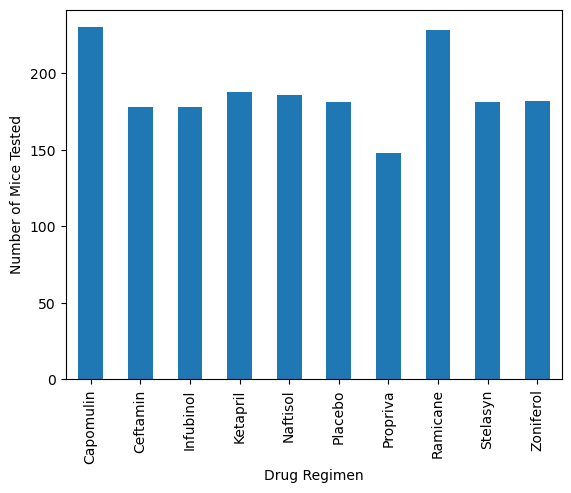

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

# get the list of drug names
drugs = clean_mouse_data_df['Drug Regimen'].unique()

#turn the array into a list
drugs_list = drugs.tolist()

num_mice = clean_mouse_data_df.groupby(['Drug Regimen']).count()['Mouse ID']

mice_drug_chart = num_mice.plot(kind='bar')
mice_drug_chart.set_xlabel("Drug Regimen")
mice_drug_chart.set_ylabel('Number of Mice Tested')
plt.show()


(0.0, 280.0)

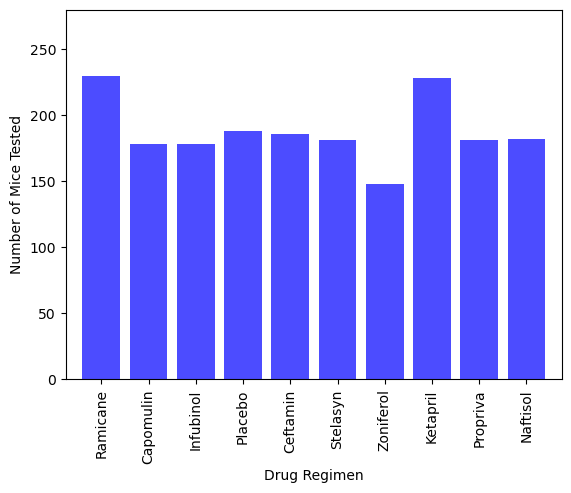

In [13]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

plt.bar(drugs_list, num_mice, color='blue', alpha=0.70, align='center')
plt.xticks(rotation=90)

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

plt.xlim(-0.75, len(drugs_list)-0.25)
plt.ylim(0, max(num_mice)+50)


In [15]:
#in preperation for creating pie charts, filter mice by gender and delete duplicate mice

sex_df = pd.DataFrame(clean_mouse_data_df, columns=['Mouse ID', 'Sex'])

#filter unique mouse ID
sex_df_unique = sex_df.drop_duplicates(subset='Mouse ID')

#find percentages of mice
percentages = sex_df_unique.groupby(['Sex']).count()['Mouse ID'] / unique_mice * 100

percentages

Sex
Female    49.596774
Male      50.403226
Name: Mouse ID, dtype: float64

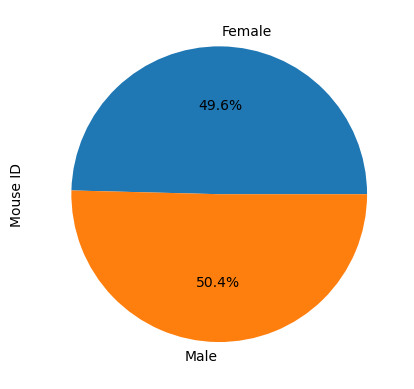

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

mice_pie = percentages.plot(kind='pie', y='list', autopct='%1.1f%%')

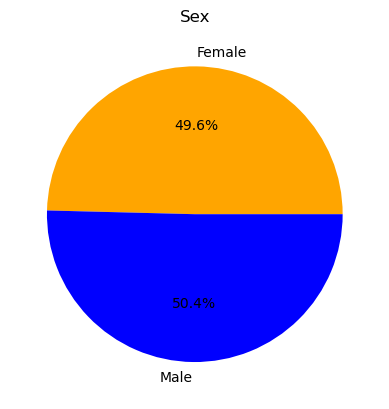

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

list = percentages.values.tolist()

plt.title("Sex")
sex = ["Female", "Male"]
colors = ['orange', 'blue']
plt.pie(list, labels=sex, colors=colors, autopct="%1.1f%%")
plt.show()

In [22]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

df_drug = clean_mouse_data_df.loc[clean_mouse_data_df['Drug Regimen'].isin
                                  (drug_names)]

# Start by getting the last (greatest) timepoint for each mouse
last_time_df = pd.DataFrame(df_drug, columns=['Mouse ID', 'Timepoint', 'Drug Regimen'])
last_time_df = last_time_df.groupby(['Mouse ID']).max()
last_time = last_time_df.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(df_drug, last_time, how='right', on=['Mouse ID', 'Timepoint'])
merged_df

,Mouse ID,Drug Regimen_x,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen_y
0,a203,Infubinol,Female,20,23,45,67.973419,2,Infubinol
1,a251,Infubinol,Female,21,25,45,65.525743,1,Infubinol
2,a275,Ceftamin,Female,20,28,45,62.999356,3,Ceftamin
3,a411,Ramicane,Male,3,22,45,38.407618,1,Ramicane
4,a444,Ramicane,Female,10,25,45,43.047543,0,Ramicane
...,...,...,...,...,...,...,...,...,...
95,y769,Ceftamin,Female,6,27,45,68.594745,4,Ceftamin
96,y793,Capomulin,Male,17,17,45,31.896238,2,Capomulin
97,y865,Ceftamin,Male,23,26,45,64.729837,3,Ceftamin
98,z578,Ramicane,Male,11,16,45,30.638696,0,Ramicane


In [25]:
# Put treatments into a list for for loop (and later for plot labels)
drug_names = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
vol_capomulin = []
vol_ceftamin = []
vol_infubinol = []
vol_ramicane = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
vol_capomulin_dr = df_drug.loc[df_drug['Drug Regimen'] == 'Capomulin']
vol_capomulin = vol_capomulin_dr[['Tumor Volume (mm3)']]

vol_ceftamin_dr = df_drug.loc[df_drug['Drug Regimen'] == 'Ceftamin']
vol_ceftamin = vol_ceftamin_dr[['Tumor Volume (mm3)']]

vol_infubinol_dr = df_drug.loc[df_drug['Drug Regimen'] == 'Infubinol']
vol_infubinol = vol_infubinol_dr[['Tumor Volume (mm3)']]

vol_ramicane_dr = df_drug.loc[df_drug['Drug Regimen'] == 'Ramicane']
vol_ramicane = vol_ramicane_dr[['Tumor Volume (mm3)']]
    
drug_vol = []    
    
for drug in drug_names:
    #first drug is 'Capomulin'. that is saved as the drug variable. I need to get the correct list
    
    if drug == 'Capomulin':
        drug_vol = vol_capomulin
        
    elif drug == 'Ramicane':
        drug_vol = vol_ramicane
        
    elif drug == 'Ceftamin':
        drug_vol = vol_ceftamin
        
    elif drug == 'Infubinol':
        drug_vol = vol_infubinol
        
    quartiles = drug_vol['Tumor Volume (mm3)'].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[.75]
    iqr = upperq-lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    print(f'Lower quartile for {drug} is {lowerq}')
    print(f'Upper quartile for {drug} is {upperq}')

    print(f"The the median for {drug} is: {quartiles[0.5]} ")
    print(f'IQR for {drug} is {iqr}')
    print(f"Values below {lower_bound} could be outliers for {drug}.")
    print(f"Values above {upper_bound} could be outliers for {drug}.")
    print('------------------------------------------------------------')


Lower quartile for Capomulin is 37.685932865
Upper quartile for Capomulin is 45.0
The the median for Capomulin is: 41.557808879999996 
IQR for Capomulin is 7.314067135000002
Values below 26.714832162499995 could be outliers for Capomulin.
Values above 55.9711007025 could be outliers for Capomulin.
------------------------------------------------------------
Lower quartile for Ramicane is 36.674634585
Upper quartile for Ramicane is 45.0
The the median for Ramicane is: 40.67323554 
IQR for Ramicane is 8.325365415
Values below 24.1865864625 could be outliers for Ramicane.
Values above 57.488048122500004 could be outliers for Ramicane.
------------------------------------------------------------
Lower quartile for Infubinol is 47.3123533
Upper quartile for Infubinol is 57.314443967500004
The the median for Infubinol is: 51.82058438 
IQR for Infubinol is 10.002090667500006
Values below 32.309217298749985 could be outliers for Infubinol.
Values above 72.31757996875001 could be outliers for I

<AxesSubplot:title={'center':'Tumor Volume (mm3)'}, xlabel='Drug Regimen_x'>

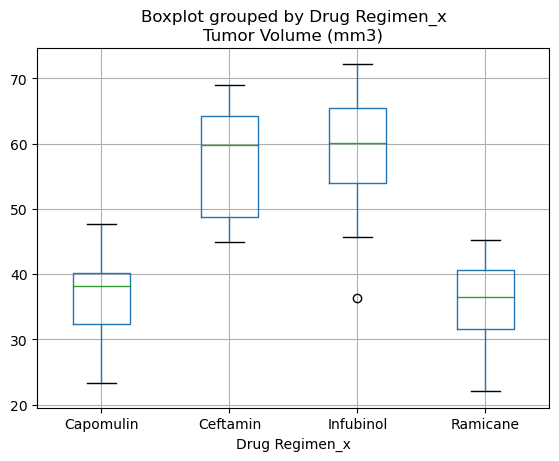

In [26]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

merged_df.boxplot(by='Drug Regimen_x', column=['Tumor Volume (mm3)'])


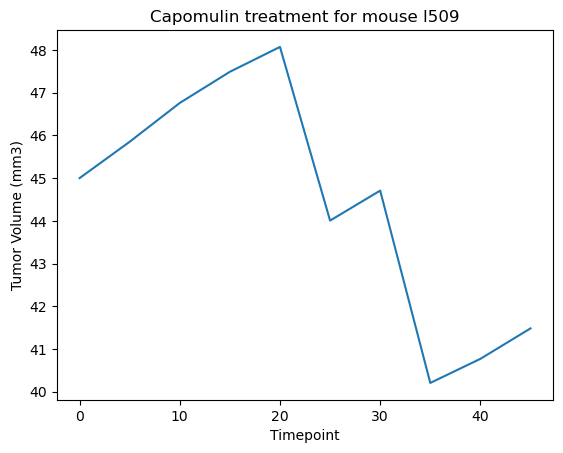

In [29]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#mouse id = i509

mouse_i = clean_mouse_data_df.loc[clean_mouse_data_df['Mouse ID'].isin(['l509'])]

x_axis = mouse_i['Timepoint']
y_axis = mouse_i['Tumor Volume (mm3)']
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment for mouse l509")
plt.plot(x_axis, y_axis) 

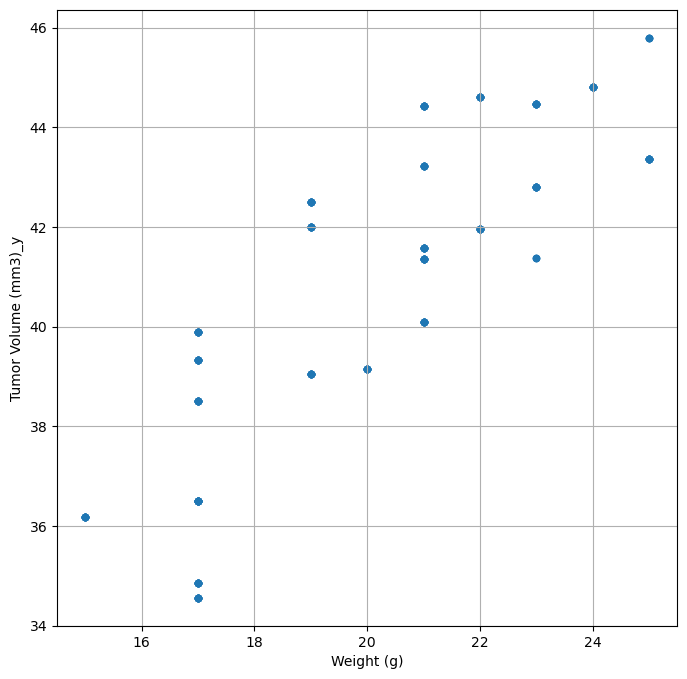

In [35]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
mouse_wt = clean_mouse_data_df.loc[clean_mouse_data_df['Drug Regimen'].isin(['Capomulin'])]

capo_data_mean = mouse_wt.groupby(['Mouse ID']).mean()['Tumor Volume (mm3)']
mouse_data_mean = pd.merge(mouse_wt, capo_data_mean, on='Mouse ID', how='left')

mouse_data_mean.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)_y', grid='True', figsize=(8,8))
plt.show()

The correlation between both factors is 0.83


Text(0, 0.5, 'Tumor Volume (mm3)_y')

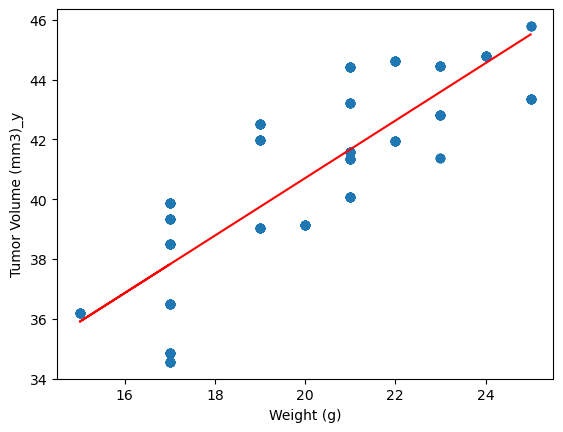

In [36]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

weight = mouse_data_mean.iloc[:,4]
tumor = mouse_data_mean.iloc[:,8]
correlation = st.pearsonr(weight,tumor)
print(f"The correlation between both factors is {round(correlation[0],2)}")

x_values = mouse_data_mean['Weight (g)']
y_values = mouse_data_mean['Tumor Volume (mm3)_y']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)_y')